# Ejemplo visualización información RGBD


Se va a mostrar un ejemplo de código en el que se cargan unos datos provenientes de una cámara RGB-D y se visualizan.

Primero se cargan los datos ya almacenados en un archivo .mat

In [2]:
graphics_toolkit("gnuplot")
load('Datos/Datos_RGBD_camera.mat')

A continuación se muestra la imagen de color

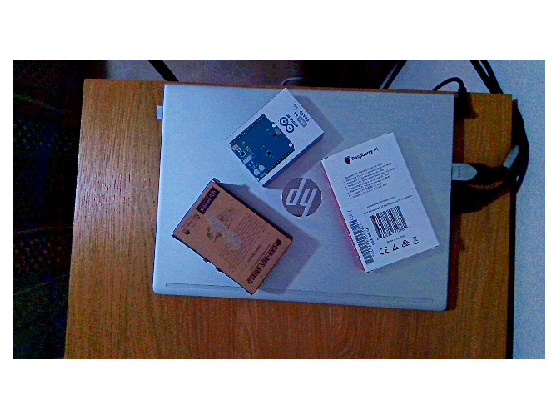

In [3]:
figure, imshow(colorImage)


Se visualiza la imagen de profundidad obtenida

ans = 1


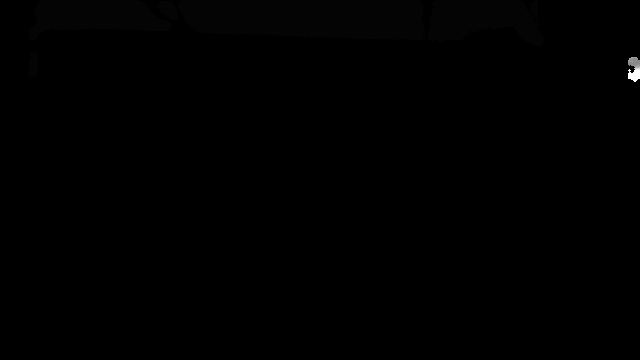

In [4]:
depthImage=depthMap/max(depthMap(:));
figure, imshow(depthMap,[0.2 0.5])

max(depthImage(:))


Se representa la nube de puntos

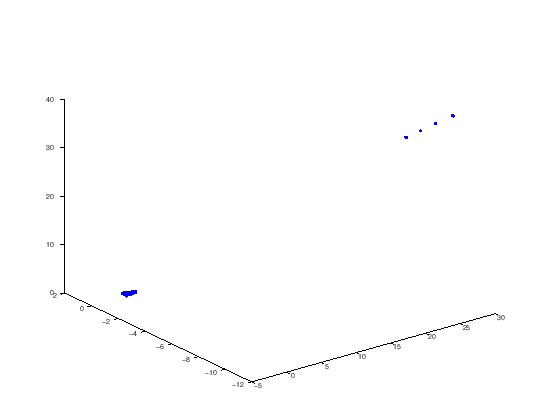

In [5]:
figure, plot3(nube_puntos(:,1),nube_puntos(:,2),nube_puntos(:,3),'.b')


Se hace un pequeño procesamiento de la nube de puntos

In [6]:
%%Eliminar puntos en el origen
index_puntos_sin_origen=find(~((nube_puntos(:,1)==0) & (nube_puntos(:,2)==0) &(nube_puntos(:,3)==0)));

pc_filt=nube_puntos(index_puntos_sin_origen,:);
%%figure, plot3(pc_filt(:,1),pc_filt(:,2),pc_filt(:,3),'.b')


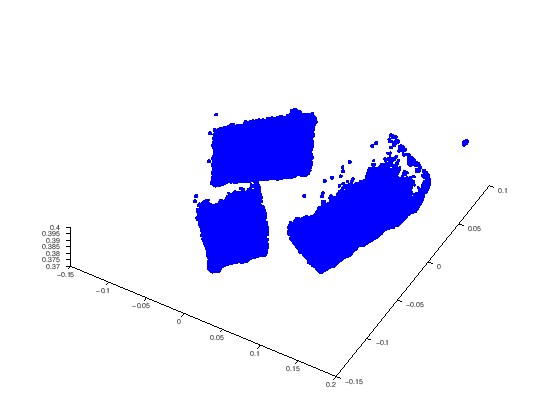

In [7]:
%%Seleccionar ROI de la nube de puntos
% roi=[-1,1,-1,1,0,0.4];
ancho=0.3;
largo=0.4;
profundo=0.4;

roi=[-largo/2,largo/2,-ancho/2,ancho/2,0,profundo];


pc_roi = pc_filt((pc_filt(:,1)>roi(1) & pc_filt(:,1)<roi(2)) & (pc_filt(:,2)>roi(3) & pc_filt(:,2)<roi(4)) & (pc_filt(:,3)>roi(5) & pc_filt(:,3)<roi(6)),:);
figure, plot3(pc_roi(:,1),pc_roi(:,2),pc_roi(:,3),'.b')
view(30,80)

Se visualiza la nube de puntos desde arriba

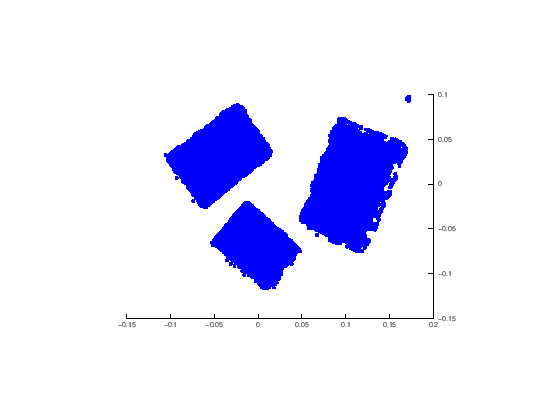

In [8]:
figure, plot3(pc_roi(:,1),pc_roi(:,2),pc_roi(:,3),'.b')
view(0,90)

Se visualiza la nube de puntos con color

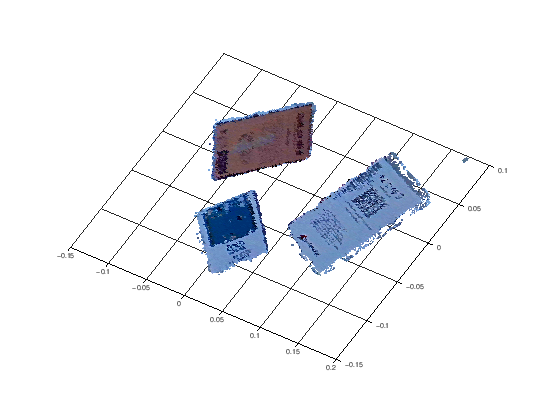

In [9]:
color=pc_roi(:,4:6);
xyz=pc_roi(:,1:3);

index=[1:size(color,1)];



marker_size=1;
figure
scatter3(xyz(:,1), xyz(:,2), xyz(:,3), marker_size, index,"filled")
colormap(color)
view(30,90)